## **Classificação de Gêneros Musicais**

> Os serviços de streaming de músicas tornaram-se o principal meio das pessoas escutarem músicas. Apesar dos enormes catálogos atraírem muitos usuários, esta grande quantidade de músicas oferecidas pode deixar os utilizadores sobrecarregados quando tentam procurar pelas músicas que se adequem aos seus gostos. Assim, os serviços de streaming têm procurado mieos de categorizar as músicas de modo a permitir recomendações personalizadas.

>Neste projeto, inspirado pela plataforma DataCamp, serão examinados os dados compilados por um grupo de pesquisa conhecido como The Echo Nest. o objetivo é analisar estes dados e classificar como Hip-Hop ou Rock. Os dados estão em 2 arquivos, CSV e JSON.

<p><img src="https://cdn.pixabay.com/photo/2017/01/18/17/14/girl-1990347_960_720.jpg" alt="pixabay" width="400px"></p>

### Dados utilizados

Como optei por utilizar o Google Colab, estarei realizando o upload dos arquivos de dados com o auxílio da função ```files.upload()```.

In [1]:
# Importando os dados a serem utilizados
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving fma-rock-vs-hiphop.csv to fma-rock-vs-hiphop.csv


Saving echonest-metrics.json to echonest-metrics.json


In [2]:
import pandas as pd

# Dados
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

# Merge entre as colunas relevantes das bases de dados 'separadas'
data_echotracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on='track_id')

data_echotracks.head(5)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [5]:
from skimpy import skim

# Inspecionando os dados
skim(data_echotracks)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4802   │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0        ┃ p25     ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ track_id             │   0 │      0 │   30000 │   29000 │         2 │    7500 │  44000 │  120000 │ █▃▂▁ ▁  │  │
│ │ acousticness         │   0 │      0 │    0.49 │    0.37 │   9.5e-07 │   0.084 │   0.86 │       1 │ █▃▂▃▃▇  │  │
│ │ danceability         │   0 │      0 │    0.44 │    0.18 │     0.051 │     0.3 │   0.57 │    0.96 │ ▃▇█▆▃▁  │  │
│ │ energy               │   0 │      0 │    0.63 │    0.24 │   0.00028 │    0.45 │   0.84 │       1 │ ▁▃▅▇▇█  │  │
│ │ instrumentalness     │   0 │      0 │     0.6 │    0.38 │         0 │    0.16 │   0.92 │    0.99 │ ▄▁▁▁▂█  │  │
│ │ liveness             │   0 │      0 │    0.19 │    0.15 │     0.025 │     0.1 │   0.22 │    0.97 │   █▂▁   │  │
│ │ speechiness          │   0 │      0 │     0.1 │    0.15 │     0.023 │   0.037 │  0.088 │    0.97 │   █▁    │  │
│ │ tempo                │   0 │      0 │     130 │      34 │        29 │      98 │    150 │     250 │   ▇█▆▂  │  │
│ │ valence              │   0 │      0 │    0.45 │    0.27 │     0.014 │    0.22 │   0.67 │    0.98 │ █▇█▇▆▄  │  │
│ └──────────────────────┴─────┴────────┴─────────┴─────────┴───────────┴─────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ genre_top                 │       0 │          0 │                            1 │                     4800 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
print(data_echotracks.genre_top.value_counts())

print("\nGênero Hip-Hop representa {:.2f}% do dataset.\n".format((data_echotracks[data_echotracks.genre_top == 'Hip-Hop'].shape[0] / data_echotracks.shape[0]) * 100))

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

Gênero Hip-Hop representa 18.95% do dataset.



A base de dados possui um problema de desbalanceamento da variável resposta. Isso pode afetar o desempenho do modelo, fazendo com que acerte/erre a classificação de uma classe se comparada com a outra.

Uma forma de resolver este problema é utilizando a abordagem *sampling*:
- over sampling: cria novas observações da classe minoritária.
- under sampling: elimina observações da classe majoritária.

Neste momento não será utilizada nenhuma abordagem. Entretanto, no final, será realizada uma comparação entre o resultado do modelo com a base padrão e o modelo com a técnica *under sampling*.

## Análise

**Relações entre variávies contínuas. Matriz de correlação.**

Verificando se há variáveis com fortes correlações entre si para evitar, se possível. Assim, evitando redundância de características (features), mantendo o modelo simples e melhorando a interpretabilidade. 

Com muitas características há o risco de sobreajuste. Além disso, a utilização de menos características pode acelerar consideravelmente o tempo de computação, caso o conjunto de dados seja muito grande.

In [7]:
corr = data_echotracks.corr()
corr.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [8]:
corr[(corr<-0.3) | (corr>0.4)]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,-0.372282,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.473165
energy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,1.000000,NaN,-0.366762,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,-0.366762,NaN,1.000000,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
valence,NaN,NaN,0.473165,NaN,NaN,NaN,NaN,NaN,1.000000


Como observado, a maior correlação positiva (0,4732) está entre as variáveis *valence* e *danceability* e a maior correlação negativa (-0,3723) está entre as variáveis *acousticness* e *track_id*. Assim, como não há presença de correlação forte positiva (acima de 0,7) e nem negativa (abaixo de -0,7) entre variáveis, não há a necessidade de remover variáveis nesta etapa.

**Divisão dos dados: treino e teste**

In [9]:
from sklearn.model_selection import train_test_split

# Features (Caracteristicas)
features = data_echotracks.drop(["genre_top", "track_id"], axis=1).values

# Labels: variavel resposta
labels = data_echotracks["genre_top"].values

# Split dos dados
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

In [10]:
features

array([[4.16675233e-01, 6.75893985e-01, 6.34476268e-01, ...,
        1.59310065e-01, 1.65922000e+02, 5.76660988e-01],
       [3.74407769e-01, 5.28643062e-01, 8.17461132e-01, ...,
        4.61818128e-01, 1.26957000e+02, 2.69240242e-01],
       [4.35668989e-02, 7.45565870e-01, 7.01469992e-01, ...,
        1.24595342e-01, 1.00260000e+02, 6.21661224e-01],
       ...,
       [1.04777022e-02, 6.52483062e-01, 6.57497709e-01, ...,
        2.29174375e-01, 9.48850000e+01, 4.32240157e-01],
       [6.79063452e-02, 4.32421004e-01, 7.64508334e-01, ...,
        3.10552525e-01, 1.71329000e+02, 5.80087111e-01],
       [1.53518164e-01, 6.38659813e-01, 7.62567227e-01, ...,
        3.03372337e-01, 7.78420000e+01, 6.56612274e-01]])

In [11]:
labels

array(['Hip-Hop', 'Hip-Hop', 'Hip-Hop', ..., 'Hip-Hop', 'Hip-Hop',
       'Hip-Hop'], dtype=object)

**PCA**

Como citado anteriormente, pode ser útil simplificar os modelos e utilizar menos características quanto necessário para alcançar o melhor resultado. Assim, vamos experimentar a Análise de Componentes Principais (PCA) para reduzir o número de características do modelo.

[PCA](https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202) é uma técnica para reduzir a dimensionalidade de tais conjuntos de dados, aumentando a interpretabilidade, mas ao mesmo tempo minimizando a perda de informações. Ele faz isso criando novas variáveis ​​não correlacionadas que maximizam sucessivamente a variância.

Como a PCA utiliza a variância absoluta, uma característica com um intervalo maior de valores irá enviesar o algoritmo em relação as outras. Por isso, deve-se primeiro normalizar os dados. Neste exemplo, será utilizada a padronização, de modo que todas as variáveis tenham média 0 e desvio padrão 1.

In [12]:
from sklearn.preprocessing import StandardScaler

# Iniciando o StandardScaler
scaler = StandardScaler()

# Padronizando train_features e test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

Text(0.5, 0, 'componente principal')

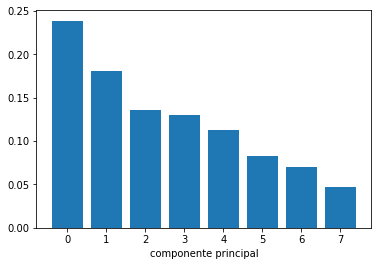

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)
exp_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_var)
ax.set_xlabel('componente principal')

Baseado no gráfico acima, não é possível utilizar a regra do *cotovelo* (queda acentuada de uma barra para outra). Devido a isso, vamos observar a parcela de variância explicada acumulada para determinar quantos componentes são necessários para explicar 85% (valor arbitrário) da variância.

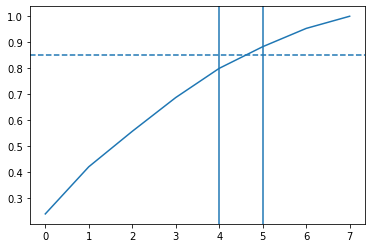

In [14]:
import numpy as np

# Calculo da variância explicada acumulada
cum_exp_var = np.cumsum(exp_var)

fig, ax = plt.subplots()
ax.plot(cum_exp_var)
ax.axhline(y=0.85, linestyle='--')
ax.axvline(x=4, linestyle='-')
ax.axvline(x=5, linestyle='-')

Observando o gráfico acima, podemos utilizar 6 componentes (perceba que o eixo x começa em 0, portanto, x=5 representa 6 componentes).

In [15]:
pca = PCA(n_components=6, random_state=10)

train_pca = pca.fit_transform(scaled_train_features)
test_pca = pca.transform(scaled_test_features)

**Algoritmo Árvores de Decisão**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Iniciando DecisionTreeClassifier()
model_tree = DecisionTreeClassifier(random_state=10)

# Treinando o modelo
model_tree.fit(train_pca, train_labels)

# Prevendo
pred_labels_model_tree = model_tree.predict(test_pca)

In [17]:
# Relatorio de Classificacao
from sklearn.metrics import classification_report
class_rep_model_tree = classification_report(test_labels, pred_labels_model_tree)

print("Relatório de Classificação - Árvore de Decisão: \n", class_rep_model_tree)

Relatório de Classificação - Árvore de Decisão: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201



Embora o desempenho do algoritmo seja aceitável (85%), não é uma boa ideia assumir que este é o melhor modelo a ser utilizado neste trabalho. Há sempre a possibilidade de outros algoritmos se saírem melhores, portanto, vale a pena testar outros algoritmos e encontrar qual o melhor para o trabalho proposto.

Neste projeto, utilizei apenas *PCA* e *Árvore de Decisão* para praticar estes algoritmos em específico.

Outro detalhe importante é sobre o desbalanceamento dos dados (citado no início). Pelo relatório de classificação é possível observar que as músicas do gênero Rock são bem classificadas, já as de Hip-Hop são desproporcionalmente mal classificadas em relação as de Rock.

Assim, vamos testar a abordagem *under sampling*.


In [21]:
hiphop = data_echotracks.loc[data_echotracks['genre_top'] == 'Hip-Hop']
rock = data_echotracks.loc[data_echotracks['genre_top'] == 'Rock']

# Amostra de Rock do mesmo tamanho de Hip-Hop
rock = rock.sample(hiphop.shape[0], random_state=10)

# Concatenando os dados
rock_hiphop = pd.concat([rock, hiphop])

print("Dados Balanceados:")
rock_hiphop.genre_top.value_counts()

Dados Balanceados:


Rock       910
Hip-Hop    910
Name: genre_top, dtype: int64

In [22]:
# Trabalhando com os dados balanceados
features = rock_hiphop.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hiphop['genre_top']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [23]:
model_tree = DecisionTreeClassifier(random_state=10)
model_tree.fit(train_pca, train_labels)
pred_labels_model_tree = model_tree.predict(test_pca)

print("Relatório de Classificação - Árvore de Decisão: \n", classification_report(test_labels, pred_labels_model_tree))

Relatório de Classificação - Árvore de Decisão: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455



Note que, apesar da classificação entre os gêneros musicais estarem próximos, ao realizar o procedimento de *under sampling* o conjunto de dados perdeu muitas observações que poderiam ser importantes para a construção do modelo.

### Bibliografia:

- [Correlation Matrix](https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp)
- [Principal component analysis: a review and recent developments](https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)